In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
# The code was removed by Watson Studio for sharing.

The purpose of this notebook, for me personally, is to learn a few things about python, github, r-markdown, and data science in general, while also diving into a subject I am interested in. After a quick dive in kaggle for data sets, I settled on seeing what data is out there for soccer and what I can do with it. 

An article that interested me as I considered this project was an article on soccer scouting:
https://www.hudl.com/blog/how-monchi-and-sevilla-fc-use-data-in-scouting

While I don't know exactly the methods Sevilla uses in scouting, this lead me to find out what data do I have available to me, that could provide some predictive measurement on player performance. I chose a simple FIFA ratings dataset from the videogame, FIFA 2020, that provides quantitative ratings on several player attributes (data from https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset). I also chose to get player statistics from the Serie A 2020 season (data from fbref.com). 

To make my question and aims as simple as possible, I asked, what ratings in FIFA provide predictive value towards player production? I chose to define production as goals and expected goals (expected goals (xG) are the number of goals that can be expected to be scored based on where and how a shot was taken).

Calculation for expected goals can be found here: https://www.americansocceranalysis.com/home/2014/05/08/calculating-expected-goals-2-0

In [3]:
import types
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Fifa ratings were downloaded to dfFifa (filtered, by team, to just teams in Serie A)

In [4]:
dfFifa.shape

(615, 107)

Serie A stats were downloaded to dfStats

In [5]:
dfStats.shape

(600, 22)

The field 'ID', was created manually in both sheets in excel before uploading to Watson Studio. Essentially, this is just a concatenation of first initial, birthdate, and team, in order to find a unique identifier for each player between the two datasets. In my previous employment, I picked up the habit of doing specific work in excel before uploading to the system, but I will go back through and code this at some other point for full transparency.

In [6]:
df2020 = pd.merge(dfFifa,dfStats,on = 'ID')

In [7]:
df2020.shape

(488, 128)

488 players were matched between the two datasets

In [8]:
df2020.head()

,hasdupes_x,ID,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,...,90s,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,0,J1988Atalanta,200647,https://sofifa.com/player/200647/josip-ilicic/...,J. IliÄiÄ‡,Josip IliÄiÄ‡,31,1/29/1988,190,79,...,18.5,15,5,0,0,1,1,9.2,9.2,6.9
1,0,D1991Atalanta,215333,https://sofifa.com/player/215333/duvan-zapata/...,D. Zapata,DuvÃ¡n Zapata,28,4/1/1991,189,88,...,22.5,18,6,1,1,1,0,14.1,13.4,4.5
2,0,L1991Atalanta,199110,https://sofifa.com/player/199110/luis-muriel/2...,L. Muriel,Luis Fernando Muriel Fruto,28,4/16/1991,179,79,...,14.0,18,1,6,7,1,0,13.9,8.5,4.0
3,0,R1993Atalanta,231969,https://sofifa.com/player/231969/ruslan-malino...,R. Malinovskyi,Ruslan Malinovskyi,26,5/4/1993,181,85,...,17.1,8,3,0,1,7,1,4.7,3.9,5.1
4,0,H1994Atalanta,220093,https://sofifa.com/player/220093/hans-hateboer...,H. Hateboer,Hans Hateboer,25,1/9/1994,187,74,...,26.2,0,4,0,0,10,0,1.6,1.6,3.5


Find a correlation matrix between primary FIFA ratings and the subsequent year statistics

In [9]:
df2020c = df2020.corr()
df2020c.iloc[17:21,69:80]

,90s,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
shooting,0.100899,0.411145,0.354154,0.258678,0.266479,-0.040275,-0.125855,0.447345,0.458849,0.457456
passing,0.169561,0.175320,0.387695,0.113289,0.116768,0.098447,-0.048798,0.190061,0.193679,0.434923
dribbling,0.129312,0.300208,0.397691,0.180721,0.185472,0.009246,-0.066235,0.319041,0.329432,0.474648
defending,0.169234,-0.338086,-0.071484,-0.216908,-0.224364,0.293330,0.087821,-0.364683,-0.371174,-0.179470


Find a correlation matrix between specific FIFA ratings and the subsequent year statistics 

In [10]:
df2020c.iloc[28:54,69:80]

,90s,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
attacking_crossing,0.070237,0.184403,0.343375,0.100317,0.105621,0.187938,0.023608,0.201958,0.213140,0.407850
attacking_finishing,0.052238,0.443412,0.351578,0.263231,0.272005,0.081121,-0.057396,0.487422,0.507281,0.465560
attacking_heading_accuracy,0.110213,0.223978,0.106560,0.130895,0.136908,0.286920,0.098027,0.251870,0.263582,0.142050
attacking_short_passing,0.127888,0.230082,0.366130,0.124513,0.129947,0.304973,0.056224,0.256323,0.272329,0.414556
attacking_volleys,0.068204,0.386436,0.361933,0.232650,0.242827,0.118905,-0.032930,0.429520,0.445371,0.463036
skill_dribbling,0.059054,0.306059,0.370310,0.165302,0.173267,0.199081,0.037633,0.332106,0.350716,0.448275
skill_curve,0.058586,0.295639,0.360664,0.179819,0.188324,0.170674,0.011333,0.322923,0.332840,0.453113
skill_fk_accuracy,0.057615,0.284206,0.371338,0.169243,0.176856,0.172701,0.017019,0.304119,0.313916,0.464630
skill_long_passing,0.142231,0.110598,0.327398,0.045369,0.049812,0.315051,0.063984,0.125599,0.139272,0.337541
skill_ball_control,0.081063,0.296733,0.365590,0.156493,0.164714,0.246994,0.039854,0.327009,0.347786,0.428309


Forwards are more likely to have higher attacking skills, and naturally more likely to have more goals due to the position. I want to take a subsection of just forwards in order to see what underlying FIFA ratings at one position indicate towards assists and goals. 

That is, what attributes in forwards can help predict goals? Perhaps high defensive attributes relative to other forwards indicates an intangible, such as a high workrate, that predicts more production. If defenders were left in, defending attributes would have a negative correlation as defenders rarely find themselves in goalscoring opportunities. 

In [11]:
df2020c.iloc[28:57,69:80]

,90s,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
attacking_crossing,0.070237,0.184403,0.343375,0.100317,0.105621,0.187938,0.023608,0.201958,0.213140,0.407850
attacking_finishing,0.052238,0.443412,0.351578,0.263231,0.272005,0.081121,-0.057396,0.487422,0.507281,0.465560
attacking_heading_accuracy,0.110213,0.223978,0.106560,0.130895,0.136908,0.286920,0.098027,0.251870,0.263582,0.142050
attacking_short_passing,0.127888,0.230082,0.366130,0.124513,0.129947,0.304973,0.056224,0.256323,0.272329,0.414556
attacking_volleys,0.068204,0.386436,0.361933,0.232650,0.242827,0.118905,-0.032930,0.429520,0.445371,0.463036
skill_dribbling,0.059054,0.306059,0.370310,0.165302,0.173267,0.199081,0.037633,0.332106,0.350716,0.448275
skill_curve,0.058586,0.295639,0.360664,0.179819,0.188324,0.170674,0.011333,0.322923,0.332840,0.453113
skill_fk_accuracy,0.057615,0.284206,0.371338,0.169243,0.176856,0.172701,0.017019,0.304119,0.313916,0.464630
skill_long_passing,0.142231,0.110598,0.327398,0.045369,0.049812,0.315051,0.063984,0.125599,0.139272,0.337541
skill_ball_control,0.081063,0.296733,0.365590,0.156493,0.164714,0.246994,0.039854,0.327009,0.347786,0.428309


In [12]:
df2020.columns[0:30]

Index(['hasdupes_x', 'ID', 'sofifa_id', 'player_url', 'short_name',
       'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined'],
      dtype='object')

In [13]:
df2020['player_positions'].unique()

array(['CF, ST', 'ST', 'CM, CAM, CDM', 'RM, RB', 'CB', 'CM', 'CM, CDM',
       'CM, CAM', 'GK', 'LM, RM, RB', 'LM, LB', 'CAM, CM, LM',
       'CAM, RW, RM', 'CM, CDM, CAM', 'ST, CAM', 'ST, CAM, LW', 'LW, LM',
       'CB, CDM', 'RB, LB', 'LB, LM', 'RW, ST', 'CDM, CM', 'CM, RM',
       'CM, CAM, CF', 'LM, RM', 'LB', 'CAM, RW', 'CAM, CM', 'CAM, CF',
       'RB', 'RB, CB, RM', 'CM, CDM, RM', 'CF, CAM', 'CB, RB', 'RM, LM',
       'CM, RM, RB', 'LB, CB', 'ST, LW, RW', 'RW, CF', 'CF, CM', 'LW, RW',
       'RB, RM', 'CM, CAM, RW', 'LW', 'CB, LB', 'RM, CM, RB', 'CAM',
       'ST, CF', 'RM, ST', 'LM, CM', 'CF, RW, ST', 'RM, RB, CM',
       'CB, LB, RB', 'CDM', 'CAM, CDM', 'RM', 'ST, LW', 'LM, RW, LW',
       'RM, CAM', 'RM, RW', 'CAM, CM, CF', 'CF, ST, CAM', 'LM',
       'LM, CM, CAM', 'CB, RB, RM', 'CF', 'RW, LW', 'ST, CAM, CF',
       'CF, ST, LW', 'CM, LW', 'RM, LM, CM', 'LW, CAM, CM', 'LW, RM',
       'CF, LW, ST', 'CM, LM', 'RM, CM, CF', 'LM, LW', 'RM, RB, RWB',
       'RW, LW, LM', 'RB, CB

In [14]:
df2020['Striker'] = df2020['player_positions'].str.contains('ST|CF')

In [15]:
df2020['Striker'].head()

0     True
1     True
2     True
3    False
4    False
Name: Striker, dtype: bool

In [16]:
df2020ST = df2020[df2020['Striker'] == True] 

In [17]:
df2020ST['player_positions'].unique()

array(['CF, ST', 'ST', 'ST, CAM', 'ST, CAM, LW', 'RW, ST', 'CM, CAM, CF',
       'CAM, CF', 'CF, CAM', 'ST, LW, RW', 'RW, CF', 'CF, CM', 'ST, CF',
       'RM, ST', 'CF, RW, ST', 'ST, LW', 'CAM, CM, CF', 'CF, ST, CAM',
       'CF', 'ST, CAM, CF', 'CF, ST, LW', 'CF, LW, ST', 'RM, CM, CF',
       'CM, ST', 'LM, RM, ST', 'CF, RW', 'CF, CM, LW', 'ST, RW, RM'],
      dtype=object)

In [18]:
df2020.shape

(488, 129)

In [19]:
df2020ST.shape

(89, 129)

Filtering for forwards only removed 399 players. I am working with 89 strikers that played in the Serie A. Now I will create a correlation matrix for the 77.

In [20]:
df2020STc = df2020ST.corr()

In [21]:
df2020STc.iloc[17:21,70:80]

,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA,Striker
shooting,0.563707,0.382845,0.425952,0.430681,0.272753,0.027369,0.603247,0.604443,0.495353,NaN
passing,0.293890,0.412602,0.185208,0.189791,0.118478,0.157264,0.291238,0.300587,0.531555,NaN
dribbling,0.377437,0.437160,0.271434,0.280173,0.166689,0.134598,0.382445,0.380068,0.555852,NaN
defending,0.096555,0.225493,0.033021,0.044201,0.048236,-0.151371,0.095546,0.105432,0.170321,NaN


In [22]:
df2020STc.iloc[28:57,70:80]

,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA,Striker
attacking_crossing,0.255851,0.361928,0.154774,0.153202,0.052123,0.118516,0.239224,0.248073,0.496425,NaN
attacking_finishing,0.491195,0.273996,0.398016,0.395716,0.232206,-0.031668,0.552290,0.553058,0.352266,NaN
attacking_heading_accuracy,0.272496,-0.100703,0.264581,0.258457,0.153102,-0.131264,0.327936,0.317473,-0.084792,NaN
attacking_short_passing,0.328893,0.434174,0.230640,0.239214,0.157689,0.139586,0.339701,0.342235,0.538617,NaN
attacking_volleys,0.448086,0.295974,0.370582,0.375655,0.227074,-0.003868,0.493537,0.482804,0.383886,NaN
skill_dribbling,0.407287,0.441653,0.276834,0.283464,0.175365,0.143151,0.401242,0.403504,0.574000,NaN
skill_curve,0.289008,0.295179,0.205397,0.207088,0.152096,0.125603,0.292257,0.294166,0.460507,NaN
skill_fk_accuracy,0.273119,0.316267,0.112176,0.103668,0.166185,0.184305,0.238806,0.271482,0.456136,NaN
skill_long_passing,0.232384,0.407438,0.116807,0.129297,0.059373,0.135844,0.230435,0.247221,0.461333,NaN
skill_ball_control,0.379921,0.435545,0.246676,0.261789,0.187001,0.109284,0.404272,0.417263,0.529575,NaN


While defending attributes appear to have no affect on goals and assists production, many of these correlations make sense. For example, better crossers of the ball found more assists in the 2020 Serie A season:

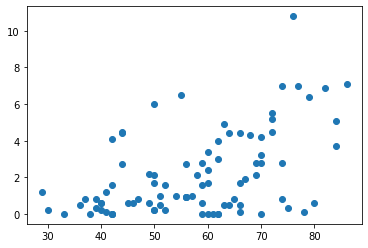

In [23]:
x = df2020ST['attacking_crossing']
y = df2020ST['xA']

plt.scatter(x, y)
plt.show()

However, strikers are less likely to find themselves in the position on the wings to make crosses. Let's go back to goals and see another relatively high correlation, like finishing to goals.

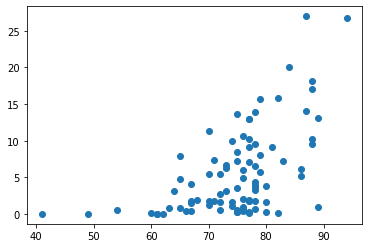

In [24]:
x = df2020ST['attacking_finishing']
y = df2020ST['xG']

plt.scatter(x, y)
plt.show()

Who is the striker with high finishing that scored just under a goal last season? With such high finishing attributes he should be a notable player. I want to find out who he is and what may have happened last year. Possibly injury or an early transfer out of the Serie A. I know we will want to adjust for minutes played in Serie A before making a model.

In [25]:
df2020STtop = df2020ST[df2020ST['attacking_finishing'] > 85] 

In [26]:
df2020STtop

,hasdupes_x,ID,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,...,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA,Striker
1,0,D1991Atalanta,215333,https://sofifa.com/player/215333/duvan-zapata/...,D. Zapata,DuvÃ¡n Zapata,28,4/1/1991,189,88,...,18,6,1,1,1,0,14.1,13.4,4.5,True
177,0,M1993Inter,201399,https://sofifa.com/player/201399/mauro-icardi/...,M. Icardi,Mauro Emanuel Icardi Rivero,26,2/19/1993,181,75,...,0,0,0,0,0,0,0.9,0.9,0.6,True
199,0,C1985Juventus,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,...,31,5,12,13,3,0,26.7,16.9,5.1,True
207,0,G1987Juventus,167664,https://sofifa.com/player/167664/gonzalo-higua...,G. HiguaÃ­n,Gonzalo Gerardo HiguaÃ­n,31,12/10/1987,186,89,...,8,4,0,0,2,0,9.5,9.5,4.3,True
226,0,C1990Lazio,192387,https://sofifa.com/player/192387/ciro-immobile...,C. Immobile,Ciro Immobile,29,2/20/1990,185,85,...,36,9,14,15,8,0,27.0,15.4,6.5,True
287,0,K1995Milan,223113,https://sofifa.com/player/223113/krzysztof-pia...,K. PiÄ…tek,Krzysztof PiÄ…tek,24,7/1/1995,183,77,...,4,0,3,3,1,0,6.2,3.9,1.0,True
313,0,D1987Napoli,175943,https://sofifa.com/player/175943/dries-mertens...,D. Mertens,Dries Mertens,32,5/6/1987,169,61,...,9,7,0,0,5,0,5.2,5.2,6.4,True
318,0,A1994Napoli,205175,https://sofifa.com/player/205175/arkadiusz-mil...,A. Milik,Arkadiusz Milik,25,2/28/1994,186,78,...,11,0,0,0,5,0,10.2,10.2,2.1,True
352,0,E1986Roma,180930,https://sofifa.com/player/180930/edin-dzeko/20...,E. DÅ¾eko,Edin DÅ¾eko,33,3/17/1986,193,80,...,16,7,0,0,4,0,18.1,18.1,4.9,True
375,0,F1983Sampdoria,159261,https://sofifa.com/player/159261/fabio-quaglia...,F. Quagliarella,Fabio Quagliarella,36,1/31/1983,180,79,...,11,3,5,7,2,0,13.1,7.8,4.4,True


This must be Mauro Icardi from Inter. He was loaned out to PSG early into the 2020 season and had few minutes in the Serie A. We should adjust our stats to be goals per 90 minutes played before going forward.

In [27]:
df2020STtop.iloc[:,116:128]

,Starts,Min,90s,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
1,25,2026,22.5,18,6,1,1,1,0,14.1,13.4,4.5
177,2,259,2.9,0,0,0,0,0,0,0.9,0.9,0.6
199,33,2917,32.4,31,5,12,13,3,0,26.7,16.9,5.1
207,20,1866,20.7,8,4,0,0,2,0,9.5,9.5,4.3
226,36,3170,35.2,36,9,14,15,8,0,27.0,15.4,6.5
287,14,1183,13.1,4,0,3,3,1,0,6.2,3.9,1.0
313,18,1689,18.8,9,7,0,0,5,0,5.2,5.2,6.4
318,19,1747,19.4,11,0,0,0,5,0,10.2,10.2,2.1
352,31,2854,31.7,16,7,0,0,4,0,18.1,18.1,4.9
375,26,2275,25.3,11,3,5,7,2,0,13.1,7.8,4.4


In [28]:
df2020ST['Glsp'] = df2020ST['Gls'] / df2020ST['90s']
df2020ST['Astp'] = df2020ST['Ast'] / df2020ST['90s']
df2020ST['xGp'] = df2020ST['xG'] / df2020ST['90s']
df2020ST['npxGp'] = df2020ST['npxG'] / df2020ST['90s']
df2020ST['xAp'] = df2020ST['xA'] / df2020ST['90s']

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Lastly let's remove penalties from the number of goals for each player. Penalties reflect the player's established role as a penalty taker on the team, as well as the team's ability to draw penalties, rather than a player's goal scoring production that season. Note that "npxG" already accounts for the removal of penalties in the xG statistic.

In [29]:
df2020ST['npGls'] = df2020ST['Gls'] - df2020ST['PK']
df2020ST['npGlsp'] = df2020ST['npGls'] / df2020ST['90s']

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Let's look at the correlations once more:

In [30]:
df2020STc = df2020ST.corr()
df2020STc.iloc[28:57,77:90]

,npxG,xA,Striker,Glsp,Astp,xGp,npxGp,xAp,npGls,npGlsp
attacking_crossing,0.248073,0.496425,NaN,0.010932,0.004332,-0.166369,-0.173790,0.412057,0.263291,0.015502
attacking_finishing,0.553058,0.352266,NaN,0.293533,0.005626,0.286187,0.234978,0.182627,0.461178,0.225707
attacking_heading_accuracy,0.317473,-0.084792,NaN,0.197717,-0.137229,0.268155,0.229095,-0.227313,0.236619,0.131454
attacking_short_passing,0.342235,0.538617,NaN,0.010238,-0.060089,-0.150231,-0.173382,0.427813,0.324545,-0.000142
attacking_volleys,0.482804,0.383886,NaN,0.163092,-0.122899,0.143031,0.080112,0.262106,0.417411,0.088311
skill_dribbling,0.403504,0.574000,NaN,0.094873,-0.000736,-0.124089,-0.166208,0.514485,0.405759,0.086483
skill_curve,0.294166,0.460507,NaN,0.062940,-0.077679,-0.117736,-0.163347,0.375672,0.283990,0.033257
skill_fk_accuracy,0.271482,0.456136,NaN,0.114571,0.003658,-0.164066,-0.148742,0.381281,0.304357,0.158643
skill_long_passing,0.247221,0.461333,NaN,-0.041649,0.035594,-0.207178,-0.203153,0.330800,0.249580,-0.015595
skill_ball_control,0.417263,0.529575,NaN,0.101575,-0.024507,-0.043351,-0.079618,0.409857,0.383570,0.083411


Let's see Mauro Icardi again

In [31]:
df2020STtop = df2020ST[df2020ST['attacking_finishing'] > 85] 
df2020STtop.iloc[:,128:136]

,Striker,Glsp,Astp,xGp,npxGp,xAp,npGls,npGlsp
1,True,0.800000,0.266667,0.626667,0.595556,0.200000,17,0.755556
177,True,0.000000,0.000000,0.310345,0.310345,0.206897,0,0.000000
199,True,0.956790,0.154321,0.824074,0.521605,0.157407,19,0.586420
207,True,0.386473,0.193237,0.458937,0.458937,0.207729,8,0.386473
226,True,1.022727,0.255682,0.767045,0.437500,0.184659,22,0.625000
287,True,0.305344,0.000000,0.473282,0.297710,0.076336,1,0.076336
313,True,0.478723,0.372340,0.276596,0.276596,0.340426,9,0.478723
318,True,0.567010,0.000000,0.525773,0.525773,0.108247,11,0.567010
352,True,0.504732,0.220820,0.570978,0.570978,0.154574,16,0.504732
375,True,0.434783,0.118577,0.517787,0.308300,0.173913,6,0.237154


And Goals per 90 minutes to finishing rating

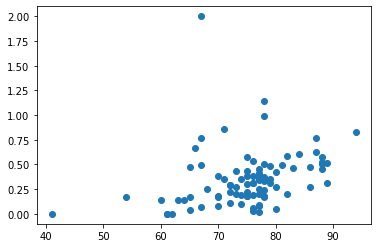

In [32]:
x = df2020ST['attacking_finishing']
y = df2020ST['xGp']

plt.scatter(x, y)
plt.show()

In [33]:
df2020ST.sort_values(by=['xGp'], inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Remove strikers with less than 500 minutes

In [34]:
df2020ST = df2020ST[df2020ST['Min'] > 500] 

In [35]:
df2020STc = df2020ST.corr()
df2020STc.iloc[28:57,77:90]

,npxG,xA,Striker,Glsp,Astp,xGp,npxGp,xAp,npGls,npGlsp
attacking_crossing,0.226369,0.548536,NaN,0.138853,0.377747,0.030343,-0.007210,0.553367,0.248420,0.118338
attacking_finishing,0.621384,0.335486,NaN,0.477913,0.233384,0.605450,0.573844,0.295438,0.501561,0.391119
attacking_heading_accuracy,0.345413,-0.220945,NaN,0.247949,-0.244909,0.408486,0.390642,-0.318191,0.237226,0.186694
attacking_short_passing,0.317221,0.580263,NaN,0.213650,0.463899,0.147633,0.091684,0.564798,0.300640,0.175625
attacking_volleys,0.549028,0.401174,NaN,0.414592,0.261292,0.505615,0.453455,0.346587,0.467402,0.333054
skill_dribbling,0.399169,0.611042,NaN,0.339566,0.449544,0.259440,0.205164,0.615603,0.405991,0.294171
skill_curve,0.269213,0.484510,NaN,0.208516,0.264721,0.147548,0.094893,0.488757,0.263132,0.172568
skill_fk_accuracy,0.189529,0.440671,NaN,0.229333,0.296035,0.116394,0.136269,0.507392,0.241491,0.247370
skill_long_passing,0.251882,0.519332,NaN,0.087420,0.438742,0.001429,-0.028848,0.459841,0.250271,0.081384
skill_ball_control,0.408209,0.556404,NaN,0.317963,0.431569,0.298500,0.269449,0.544750,0.372663,0.287599


In [36]:
df2020STc[['xG','npxG','npxGp']].iloc[28:57,:]

,xG,npxG,npxGp
attacking_crossing,0.222223,0.226369,-0.007210
attacking_finishing,0.615377,0.621384,0.573844
attacking_heading_accuracy,0.355419,0.345413,0.390642
attacking_short_passing,0.323857,0.317221,0.091684
attacking_volleys,0.559028,0.549028,0.453455
skill_dribbling,0.404013,0.399169,0.205164
skill_curve,0.272002,0.269213,0.094893
skill_fk_accuracy,0.162290,0.189529,0.136269
skill_long_passing,0.235412,0.251882,-0.028848
skill_ball_control,0.397149,0.408209,0.269449


It makes sense that adjusting for goals per 90 minutes and non penalty goals will consequently decrease correlation with ratings. Players who take penalties for their teams are the highest rated, most productive players. Likewise players with the most minutes are higher rated players ie a  productive player (per 90) who had just 10 appearances in the Serie A is unlikely to have a favorable rating.

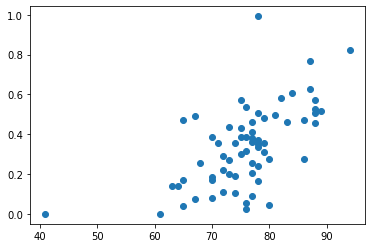

In [37]:
x = df2020ST['attacking_finishing']
y = df2020ST['xGp']

plt.scatter(x, y)
plt.show()

However, one attribute stands out: "Power_Strength" actually increases after adjusting for non-penalty goals, and again after adjusting for non-penalty goals per-90. I want to look more closely at this correlation, even though it is not relatively as strong as the other correlations. While it may be circumstantial, this attribute may be the type of indicator of up and coming goalscorers I am looking for; one that is not derivative of Fifa's iterative process of basing attacking ratings on the prior year's goal scoring statistics.

In [38]:
df2020STc[['xG','npxG','npxGp']].iloc[46:48,:]

,xG,npxG,npxGp
power_strength,0.196685,0.222540,0.353817
power_long_shots,0.479809,0.477648,0.297533


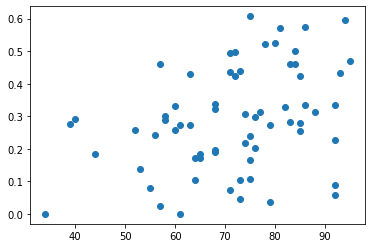

In [39]:
x = df2020ST['power_strength']
y = df2020ST['npxGp']

plt.scatter(x, y)
plt.show()

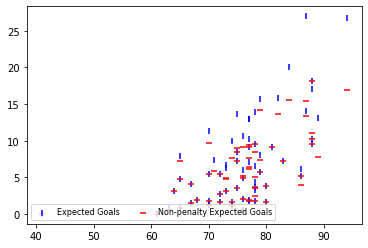

In [48]:
colors = ['b', 'r', 'y']

x = df2020ST['attacking_finishing']
y1 = df2020ST['xG']
y2 = df2020ST['npxG']
#y3 = df2020ST['npxGp']

y_1 = plt.scatter(x, y1, marker='|', color=colors[0])
y_2 = plt.scatter(x, y2, marker='_', color=colors[1])
#y_3 = plt.scatter(x, y3, marker='+', color=colors[2])

plt.legend((y_1, y_2),
           ('Expected Goals', 'Non-penalty Expected Goals', 'npxGp'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

Perhaps this generation of higher strength Serie A forwards don't take as many penalties? In that case I want to look at previous years in the next post. But let's see if this is the case. 

In [41]:
df2020STc[['PK','xG']].iloc[46:48,:]

,PK,xG
power_strength,0.077964,0.196685
power_long_shots,0.339816,0.479809


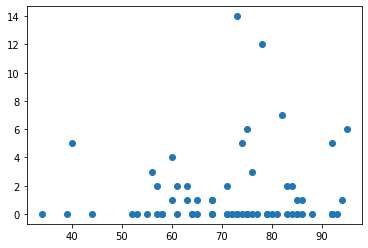

In [42]:
x = df2020ST['power_strength']
y = df2020ST['PK']

plt.scatter(x, y)
plt.show()

This relationship appears random, which is promising (the correlation is near zero: there is no relationship between strength and penalty kicks). The highest penalty taker in 2020 falls in the middle of strength. I suspect that is Ciro Immobile.

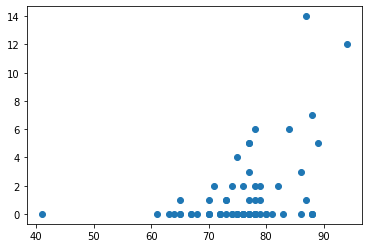

In [49]:
x = df2020ST['attacking_finishing']
y = df2020ST['PK']

plt.scatter(x, y)
plt.show()

However, a rating like long shots does show positive correlation, and this makes sense. Players with high shooting attributes may be better penalty takers for their teams. This applies to many of the other attacking ratings as well. Yet physical strength ought to (and does) have no correlation with a purely technical statistic. The increase in correlation related to removing penalties must be circumstantial (and the increase is indeed small). Let's look at the correlation between strength and the goal adjustments again:

In [44]:
df2020STc[['xG','npxG','npxGp']].iloc[46:47,:]

,xG,npxG,npxGp
power_strength,0.196685,0.22254,0.353817


I am more interested in the increase due to the adjustment per 90 minutes. Does this imply players with high physical strength are less correlated with minutes played, while remaining correlated with goals scored?

In [45]:
df2020STc[['Min','xG']].iloc[46:48,:]

,Min,xG
power_strength,-0.009126,0.196685
power_long_shots,0.320422,0.479809


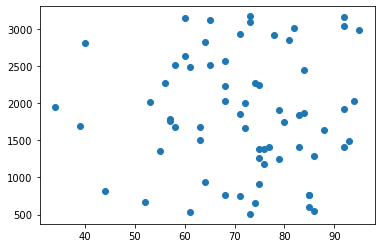

In [46]:
x = df2020ST['power_strength']
y = df2020ST['Min']

plt.scatter(x, y)
plt.show()

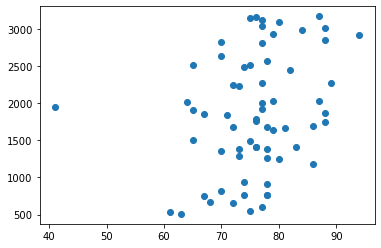

In [50]:
x = df2020ST['attacking_finishing']
y = df2020ST['Min']

plt.scatter(x, y)
plt.show()

It appears, like penalties, strength has a less positive correlation with minutes played for forwards than other attacking ratings. I find this very promising. Essentially most attacking ratings represent an iterative process from the FIFA videogame ratings, whereby having a strong body of work, particularly from the season prior, rewards players with high numbers. Likewise a player coming off a strong year will also play more minutes, take more penalties, and score more goals the following season. When I create a predictive model, I want to avoid completely regurgitating how a player's past production predicts future production; we know this is true already and do not need FIFA ratings to say that. 

To summarize: when I started this, my question was if some attribute in the FIFA ratings might indirectly represent some intangible quality, independent from years prior, that could be part of a model to predict future goals. My first assumption was perhaps defensive qualities in forwards represent something like workrate, teamwork, or personal determination that may predict their improvement into the next year. In other words, did FIFA identify something in the player unrelated to prior performance, that could, however loosely, indicate future performance? It turned out defensive qualities in forwards remained unrelated, or even adverse to a forward's production the next season. It may be that any defensive qualities in some forwards simply indicates the player's positional tendencies to remain away from the goal. 

Yet physical strength according to FIFA remains independent of minutes, other attacking ratings, and therefore of prior success, while at the same time still having some positive correlation to production the following season. In the following posts, I will investigate this further, with more seasons and more data, with the hopes of discovering variables to help predict attacking production in soccer. 